Import libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [45]:
df = pd.read_csv('Vehicle_Insurance_Data_New.csv')
df.head()

Customer_ID          City Work_Status  Gender  Coverage_Type  \
0     10000000  Indianapolis    Employed  Female   Primary_Plan   
1     10000001         Tampa  Unemployed  Female  Extended_Plan   
2     10000002     Fairfield    Employed  Female   Premium_Plan   
3     10000003        Boston  Unemployed    Male   Primary_Plan   
4     10000004  Indianapolis    Employed    Male   Primary_Plan   

           Accessbility  Vehicle_Type  Monthly_Premium  Open_Policies  \
0                Agents  Coupe_2 Door              138              1   
1                Agents  Sedan_4 Door              188              8   
2                Agents  Coupe_2 Door              216              2   
3  Customer_Call_Centre           SUV              212              7   
4                Agents  Sedan_4 Door              146              1   

   Renew_Offer_Type  Vehicle_Age_In_Years  Weeks_Since_Claim  \
0                 1                    10                138   
1                 3                     2                 56   
2                 1                     2                 77   
3                 1                     2                 77   
4                 1                     3                 52   

   Premium_Increase_In_Percent  Claims_Processingtime_In_Days Churn  
0                            5                             15    No  
1                            6                             25    No  
2                            6                             20    No  
3                            6                             20    No  
4                            6                             20    No

Drop unnecessary columns which are not required for processing.

In [46]:
df=df.drop(columns=['Customer_ID'])
df.head()

City Work_Status  Gender  Coverage_Type          Accessbility  \
0  Indianapolis    Employed  Female   Primary_Plan                Agents   
1         Tampa  Unemployed  Female  Extended_Plan                Agents   
2     Fairfield    Employed  Female   Premium_Plan                Agents   
3        Boston  Unemployed    Male   Primary_Plan  Customer_Call_Centre   
4  Indianapolis    Employed    Male   Primary_Plan                Agents   

   Vehicle_Type  Monthly_Premium  Open_Policies  Renew_Offer_Type  \
0  Coupe_2 Door              138              1                 1   
1  Sedan_4 Door              188              8                 3   
2  Coupe_2 Door              216              2                 1   
3           SUV              212              7                 1   
4  Sedan_4 Door              146              1                 1   

   Vehicle_Age_In_Years  Weeks_Since_Claim  Premium_Increase_In_Percent  \
0                    10                138                            5   
1                     2                 56                            6   
2                     2                 77                            6   
3                     2                 77                            6   
4                     3                 52                            6   

   Claims_Processingtime_In_Days Churn  
0                             15    No  
1                             25    No  
2                             20    No  
3                             20    No  
4                             20    No

Performing some analysis related to Data type & checking if it has some null values.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   City                           4999 non-null   object
 1   Work_Status                    4999 non-null   object
 2   Gender                         4999 non-null   object
 3   Coverage_Type                  4999 non-null   object
 4   Accessbility                   4999 non-null   object
 5   Vehicle_Type                   4999 non-null   object
 6   Monthly_Premium                4999 non-null   int64 
 7   Open_Policies                  4999 non-null   int64 
 8   Renew_Offer_Type               4999 non-null   int64 
 9   Vehicle_Age_In_Years           4999 non-null   int64 
 10  Weeks_Since_Claim              4999 non-null   int64 
 11  Premium_Increase_In_Percent    4999 non-null   int64 
 12  Claims_Processingtime_In_Days  4999 non-null   int64 
 13  Chu

In [48]:
df.describe(include='all')

City Work_Status  Gender Coverage_Type Accessbility  Vehicle_Type  \
count     4999        4999    4999          4999         4999          4999   
unique       5           5       2             3            4             6   
top     Denver    Employed  Female  Primary_Plan       Agents  Sedan_4 Door   
freq      1545        3125    2545          3081         1889          2533   
mean       NaN         NaN     NaN           NaN          NaN           NaN   
std        NaN         NaN     NaN           NaN          NaN           NaN   
min        NaN         NaN     NaN           NaN          NaN           NaN   
25%        NaN         NaN     NaN           NaN          NaN           NaN   
50%        NaN         NaN     NaN           NaN          NaN           NaN   
75%        NaN         NaN     NaN           NaN          NaN           NaN   
max        NaN         NaN     NaN           NaN          NaN           NaN   

        Monthly_Premium  Open_Policies  Renew_Offer_Type  \
count       4999.000000    4999.000000       4999.000000   
unique              NaN            NaN               NaN   
top                 NaN            NaN               NaN   
freq                NaN            NaN               NaN   
mean         186.400080       3.006201          1.969794   
std           68.963619       2.426709          1.016120   
min          122.000000       1.000000          1.000000   
25%          138.000000       1.000000          1.000000   
50%          166.000000       2.000000          2.000000   
75%          218.000000       4.000000          3.000000   
max          594.000000       9.000000          4.000000   

        Vehicle_Age_In_Years  Weeks_Since_Claim  Premium_Increase_In_Percent  \
count            4999.000000        4999.000000                  4999.000000   
unique                   NaN                NaN                          NaN   
top                      NaN                NaN                          NaN   
freq                     NaN                NaN                          NaN   
mean                4.535507          65.030206                     7.813163   
std                 2.489974          43.350915                     3.269583   
min                 1.000000           0.000000                     2.000000   
25%                 2.000000          26.000000                     5.000000   
50%                 4.000000          60.000000                     7.000000   
75%                 6.000000          99.000000                    10.000000   
max                10.000000         150.000000                    45.000000   

        Claims_Processingtime_In_Days Churn  
count                     4999.000000  4999  
unique                            NaN     2  
top                               NaN    No  
freq                              NaN  4267  
mean                        25.908782   NaN  
std                          8.599841   NaN  
min                          8.000000   NaN  
25%                         20.000000   NaN  
50%                         25.000000   NaN  
75%                         34.000000   NaN  
max                         45.000000   NaN

In [49]:
df.isnull().sum()

City                             0
Work_Status                      0
Gender                           0
Coverage_Type                    0
Accessbility                     0
Vehicle_Type                     0
Monthly_Premium                  0
Open_Policies                    0
Renew_Offer_Type                 0
Vehicle_Age_In_Years             0
Weeks_Since_Claim                0
Premium_Increase_In_Percent      0
Claims_Processingtime_In_Days    0
Churn                            0
dtype: int64

In [50]:
df.columns

Index(['City', 'Work_Status', 'Gender', 'Coverage_Type', 'Accessbility',
       'Vehicle_Type', 'Monthly_Premium', 'Open_Policies', 'Renew_Offer_Type',
       'Vehicle_Age_In_Years', 'Weeks_Since_Claim',
       'Premium_Increase_In_Percent', 'Claims_Processingtime_In_Days',
       'Churn'],
      dtype='object')

In [51]:
df['Churn'].value_counts()

No     4267
Yes     732
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

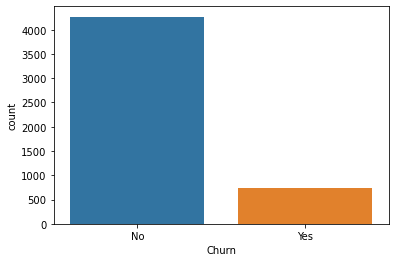

In [52]:
sns.countplot(df['Churn'])

In [53]:
df_copy = df.copy()

Data Exploration:
1. Plot distibution of individual predictors by churn

Univariate Analysis

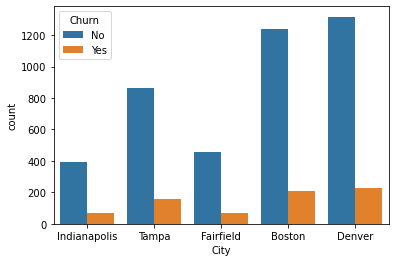

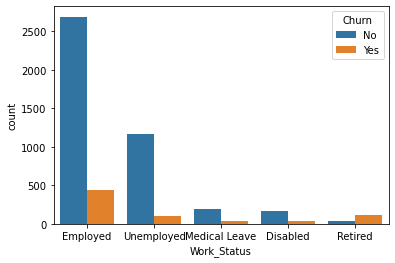

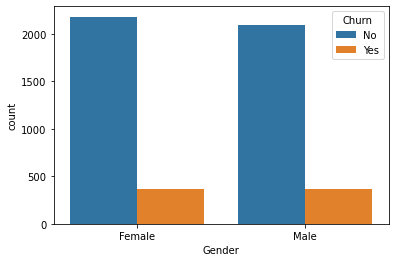

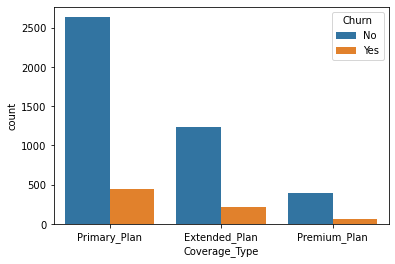

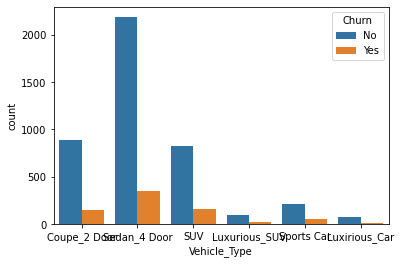

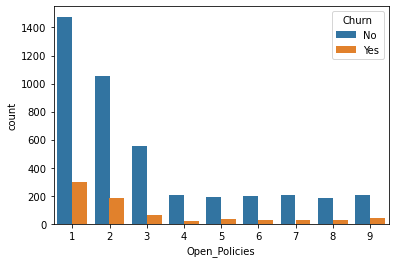

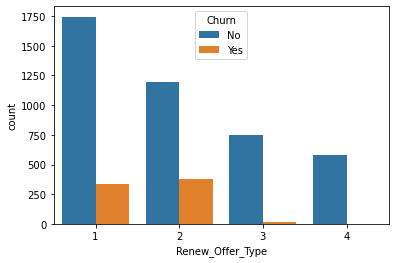

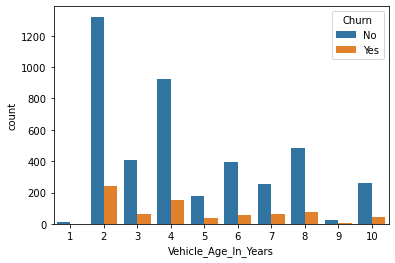

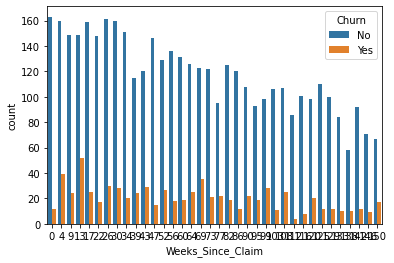

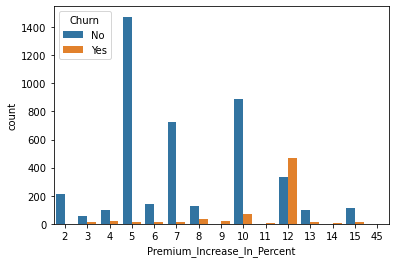

In [54]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn','Monthly_Premium'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='Churn')

In [55]:
df_plot = df_copy.groupby(['Coverage_Type','Churn']).size().reset_index().pivot(columns='Coverage_Type', index='Churn', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(13,7))
plt.ylabel('Number of customers')
plt.title('Vehicle insurance Coverage Type of customers');

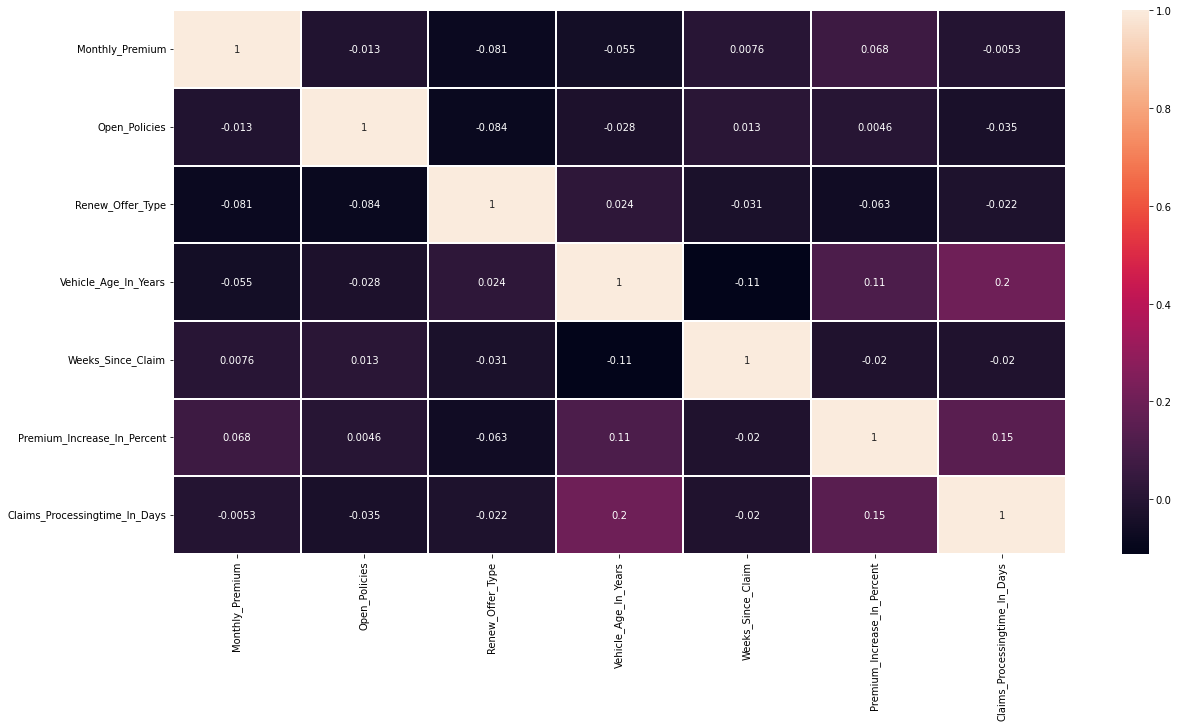

In [56]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_copy.corr(), annot=True,linewidths = 2)
plt.show()

In [57]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)
df_copy.head()

City Work_Status  Gender  Coverage_Type          Accessbility  \
0  Indianapolis    Employed  Female   Primary_Plan                Agents   
1         Tampa  Unemployed  Female  Extended_Plan                Agents   
2     Fairfield    Employed  Female   Premium_Plan                Agents   
3        Boston  Unemployed    Male   Primary_Plan  Customer_Call_Centre   
4  Indianapolis    Employed    Male   Primary_Plan                Agents   

   Vehicle_Type  Monthly_Premium  Open_Policies  Renew_Offer_Type  \
0  Coupe_2 Door              138              1                 1   
1  Sedan_4 Door              188              8                 3   
2  Coupe_2 Door              216              2                 1   
3           SUV              212              7                 1   
4  Sedan_4 Door              146              1                 1   

   Vehicle_Age_In_Years  Weeks_Since_Claim  Premium_Increase_In_Percent  \
0                    10                138                            5   
1                     2                 56                            6   
2                     2                 77                            6   
3                     2                 77                            6   
4                     3                 52                            6   

   Claims_Processingtime_In_Days  Churn  
0                             15      0  
1                             25      0  
2                             20      0  
3                             20      0  
4                             20      0

In [58]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

Monthly_Premium  Open_Policies  Renew_Offer_Type  Vehicle_Age_In_Years  \
0              138              1                 1                    10   
1              188              8                 3                     2   
2              216              2                 1                     2   
3              212              7                 1                     2   
4              146              1                 1                     3   

   Weeks_Since_Claim  Premium_Increase_In_Percent  \
0                138                            5   
1                 56                            6   
2                 77                            6   
3                 77                            6   
4                 52                            6   

   Claims_Processingtime_In_Days  Churn  City_Boston  City_Denver  ...  \
0                             15      0            0            0  ...   
1                             25      0            0            0  ...   
2                             20      0            0            0  ...   
3                             20      0            1            0  ...   
4                             20      0            0            0  ...   

   Accessbility_Agents  Accessbility_Customer_Call_Centre  \
0                    1                                  0   
1                    1                                  0   
2                    1                                  0   
3                    0                                  1   
4                    1                                  0   

   Accessbility_Direct Branch Contact  Accessbility_Website  \
0                                   0                     0   
1                                   0                     0   
2                                   0                     0   
3                                   0                     0   
4                                   0                     0   

   Vehicle_Type_Coupe_2 Door  Vehicle_Type_Luxirious_Car  \
0                          1                           0   
1                          0                           0   
2                          1                           0   
3                          0                           0   
4                          0                           0   

   Vehicle_Type_Luxurious_SUV  Vehicle_Type_SUV  Vehicle_Type_Sedan_4 Door  \
0                           0                 0                          0   
1                           0                 0                          1   
2                           0                 0                          0   
3                           0                 1                          0   
4                           0                 0                          1   

   Vehicle_Type_Sports Car  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 33 columns]

Text(0.5, 1.0, 'Monthly Premium by churn')

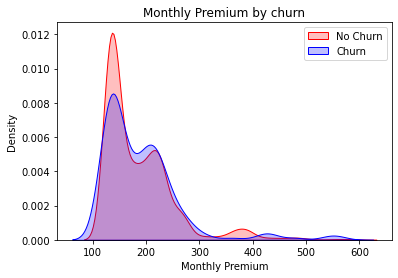

In [59]:
Mth = sns.kdeplot(df_copy_dummies.Monthly_Premium[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.Monthly_Premium[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Premium')
Mth.set_title('Monthly Premium by churn')

In [60]:
Mth = sns.kdeplot(df_copy_dummies.Weeks_Since_Claim[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.Weeks_Since_Claim[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Weeks_Since_Claim ')
Mth.set_title('Weeks_Since_Claim by churn')

Text(0.5, 1.0, 'Weeks_Since_Claim by churn')

Text(0.5, 1.0, 'Renew_Offer_Type by churn')

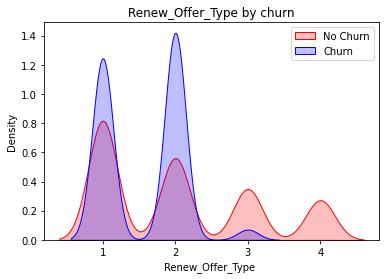

In [61]:
Mth = sns.kdeplot(df_copy_dummies.Renew_Offer_Type[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.Renew_Offer_Type[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Renew_Offer_Type ')
Mth.set_title('Renew_Offer_Type by churn')

Text(0.5, 1.0, 'Premium_Increase_In_Percent by churn')

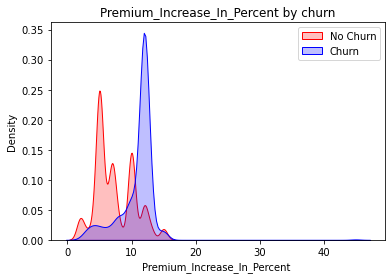

In [62]:
Mth = sns.kdeplot(df_copy_dummies.Premium_Increase_In_Percent[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.Premium_Increase_In_Percent[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Premium_Increase_In_Percent ')
Mth.set_title('Premium_Increase_In_Percent by churn')

In [63]:
Mth = sns.kdeplot(df_copy_dummies.Claims_Processingtime_In_Days[(df_copy_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy_dummies.Claims_Processingtime_In_Days[(df_copy_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Claims_Processingtime_In_Days ')
Mth.set_title('Claims_Processingtime_In_Days by churn')

Text(0.5, 1.0, 'Claims_Processingtime_In_Days by churn')

Convert all the categorical variables into dummy variables

In [64]:
df = pd.get_dummies(df,drop_first = True)

In [65]:
df.head()

Monthly_Premium  Open_Policies  Renew_Offer_Type  Vehicle_Age_In_Years  \
0              138              1                 1                    10   
1              188              8                 3                     2   
2              216              2                 1                     2   
3              212              7                 1                     2   
4              146              1                 1                     3   

   Weeks_Since_Claim  Premium_Increase_In_Percent  \
0                138                            5   
1                 56                            6   
2                 77                            6   
3                 77                            6   
4                 52                            6   

   Claims_Processingtime_In_Days  City_Denver  City_Fairfield  \
0                             15            0               0   
1                             25            0               0   
2                             20            0               1   
3                             20            0               0   
4                             20            0               0   

   City_Indianapolis  ...  Coverage_Type_Primary_Plan  \
0                  1  ...                           1   
1                  0  ...                           0   
2                  0  ...                           0   
3                  0  ...                           1   
4                  1  ...                           1   

   Accessbility_Customer_Call_Centre  Accessbility_Direct Branch Contact  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  1                                   0   
4                                  0                                   0   

   Accessbility_Website  Vehicle_Type_Luxirious_Car  \
0                     0                           0   
1                     0                           0   
2                     0                           0   
3                     0                           0   
4                     0                           0   

   Vehicle_Type_Luxurious_SUV  Vehicle_Type_SUV  Vehicle_Type_Sedan_4 Door  \
0                           0                 0                          0   
1                           0                 0                          1   
2                           0                 0                          0   
3                           0                 1                          0   
4                           0                 0                          1   

   Vehicle_Type_Sports Car  Churn_Yes  
0                        0          0  
1                        0          0  
2                        0          0  
3                        0          0  
4                        0          0  

[5 rows x 27 columns]

In [66]:
df.tail()

Monthly_Premium  Open_Policies  Renew_Offer_Type  Vehicle_Age_In_Years  \
4994              142              1                 1                     6   
4995              144              5                 2                     6   
4996              222              3                 2                     6   
4997              124              1                 3                     6   
4998              142              1                 4                     6   

      Weeks_Since_Claim  Premium_Increase_In_Percent  \
4994                 34                            5   
4995                 43                            5   
4996                 26                            5   
4997                 43                            5   
4998                  9                            5   

      Claims_Processingtime_In_Days  City_Denver  City_Fairfield  \
4994                             25            0               0   
4995                             25            0               0   
4996                             25            0               1   
4997                             25            0               0   
4998                             25            0               0   

      City_Indianapolis  ...  Coverage_Type_Primary_Plan  \
4994                  0  ...                           1   
4995                  0  ...                           1   
4996                  0  ...                           0   
4997                  0  ...                           1   
4998                  0  ...                           1   

      Accessbility_Customer_Call_Centre  Accessbility_Direct Branch Contact  \
4994                                  0                                   1   
4995                                  0                                   0   
4996                                  0                                   1   
4997                                  0                                   1   
4998                                  0                                   1   

      Accessbility_Website  Vehicle_Type_Luxirious_Car  \
4994                     0                           0   
4995                     0                           0   
4996                     0                           0   
4997                     0                           0   
4998                     0                           0   

      Vehicle_Type_Luxurious_SUV  Vehicle_Type_SUV  Vehicle_Type_Sedan_4 Door  \
4994                           0                 0                          1   
4995                           0                 0                          1   
4996                           0                 0                          1   
4997                           0                 0                          1   
4998                           0                 0                          1   

      Vehicle_Type_Sports Car  Churn_Yes  
4994                        0          0  
4995                        0          0  
4996                        0          0  
4997                        0          0  
4998                        0          0  

[5 rows x 27 columns]

Build a corelation of all predictors with 'Churn'

In [67]:
df['Churn_Yes'].value_counts()

0    4267
1     732
Name: Churn_Yes, dtype: int64

In [68]:
X = df.drop('Churn_Yes',axis=1)
y = df['Churn_Yes']

In [69]:
X.head()

Monthly_Premium  Open_Policies  Renew_Offer_Type  Vehicle_Age_In_Years  \
0              138              1                 1                    10   
1              188              8                 3                     2   
2              216              2                 1                     2   
3              212              7                 1                     2   
4              146              1                 1                     3   

   Weeks_Since_Claim  Premium_Increase_In_Percent  \
0                138                            5   
1                 56                            6   
2                 77                            6   
3                 77                            6   
4                 52                            6   

   Claims_Processingtime_In_Days  City_Denver  City_Fairfield  \
0                             15            0               0   
1                             25            0               0   
2                             20            0               1   
3                             20            0               0   
4                             20            0               0   

   City_Indianapolis  ...  Coverage_Type_Premium_Plan  \
0                  1  ...                           0   
1                  0  ...                           0   
2                  0  ...                           1   
3                  0  ...                           0   
4                  1  ...                           0   

   Coverage_Type_Primary_Plan  Accessbility_Customer_Call_Centre  \
0                           1                                  0   
1                           0                                  0   
2                           0                                  0   
3                           1                                  1   
4                           1                                  0   

   Accessbility_Direct Branch Contact  Accessbility_Website  \
0                                   0                     0   
1                                   0                     0   
2                                   0                     0   
3                                   0                     0   
4                                   0                     0   

   Vehicle_Type_Luxirious_Car  Vehicle_Type_Luxurious_SUV  Vehicle_Type_SUV  \
0                           0                           0                 0   
1                           0                           0                 0   
2                           0                           0                 0   
3                           0                           0                 1   
4                           0                           0                 0   

   Vehicle_Type_Sedan_4 Door  Vehicle_Type_Sports Car  
0                          0                        0  
1                          1                        0  
2                          0                        0  
3                          0                        0  
4                          1                        0  

[5 rows x 26 columns]

In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn_Yes, dtype: uint8

In [71]:
y.tail()

4994    0
4995    0
4996    0
4997    0
4998    0
Name: Churn_Yes, dtype: uint8

Handling Imbalanced Data with SMOTE

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [74]:
X_res

Monthly_Premium  Open_Policies  Renew_Offer_Type  Vehicle_Age_In_Years  \
0                 138              1                 1                    10   
1                 188              8                 3                     2   
2                 216              2                 1                     2   
3                 212              7                 1                     2   
4                 146              1                 1                     3   
...               ...            ...               ...                   ...   
8529              192              5                 1                     6   
8530              131              1                 2                     5   
8531              122              1                 2                     2   
8532              132              7                 2                     5   
8533              278              1                 1                     7   

      Weeks_Since_Claim  Premium_Increase_In_Percent  \
0                   138                            5   
1                    56                            6   
2                    77                            6   
3                    77                            6   
4                    52                            6   
...                 ...                          ...   
8529                120                            4   
8530                106                           12   
8531                 69                           12   
8532                138                           12   
8533                 13                            7   

      Claims_Processingtime_In_Days  City_Denver  City_Fairfield  \
0                                15            0               0   
1                                25            0               0   
2                                20            0               1   
3                                20            0               0   
4                                20            0               0   
...                             ...          ...             ...   
8529                             32            0               0   
8530                             45            0               0   
8531                             39            0               0   
8532                             35            0               0   
8533                             35            0               0   

      City_Indianapolis  ...  Coverage_Type_Premium_Plan  \
0                     1  ...                           0   
1                     0  ...                           0   
2                     0  ...                           1   
3                     0  ...                           0   
4                     1  ...                           0   
...                 ...  ...                         ...   
8529                  0  ...                           0   
8530                  0  ...                           0   
8531                  0  ...                           0   
8532                  0  ...                           0   
8533                  0  ...                           0   

      Coverage_Type_Primary_Plan  Accessbility_Customer_Call_Centre  \
0                              1                                  0   
1                              0                                  0   
2                              0                                  0   
3                              1                                  1   
4                              1                                  0   
...                          ...                                ...   
8529                           0                                  0   
8530                           1                                  0   
8531                           1                                  0   
8532                           1                                  0   
8533                           0                     

In [75]:
y_res.value_counts()

0    4267
1    4267
Name: Churn_Yes, dtype: int64

In [76]:
sns.countplot(y_res)

<AxesSubplot:xlabel='Churn_Yes', ylabel='count'>

Splitting The Dataset into Training Set and Test Set

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.85269127,  0.06260054,  1.43386008, ..., -0.4806649 ,
         1.10810651, -0.22135706],
       [-0.1919919 ,  0.06260054,  0.30473071, ..., -0.4806649 ,
         1.10810651, -0.22135706],
       [-0.67375186, -0.78144697,  0.30473071, ..., -0.4806649 ,
        -0.90244033, -0.22135706],
       ...,
       [-0.79763299,  0.06260054, -0.82439865, ..., -0.4806649 ,
        -0.90244033, -0.22135706],
       [-0.77010385, -0.78144697,  1.43386008, ..., -0.4806649 ,
         1.10810651, -0.22135706],
       [ 1.08811313, -0.78144697,  0.30473071, ..., -0.4806649 ,
        -0.90244033, -0.22135706]])

Model training and Evaluation

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [82]:
def evaluate_algorithms(X_train, X_test, y_train, y_test,model_predictions,model):
    print(f'The results from the {model}')
    print('---------------------')
    print('accuracy:',accuracy_score(y_test,model_predictions))
    print('f1:',f1_score(y_test,model_predictions))
    print('recall:',recall_score(y_test, model_predictions))
    print('precision:',precision_score(y_test, model_predictions))
    sns.heatmap(confusion_matrix(model_predictions, y_test),annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False,cmap='icefire')
    plt.title('Confusion Matrix', color='navy', fontsize=15)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values');

Logistic Regression

In [83]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
LR_pred = lr.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,LR_pred,model=lr)

The results from the LogisticRegression()
---------------------
accuracy: 0.9320577899258102
f1: 0.9303442754203363
recall: 0.9303442754203363
precision: 0.9303442754203363


SVC

In [84]:
from sklearn import svm

In [85]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,svm_pred,model=svm)

The results from the SVC()
---------------------
accuracy: 0.9539242483404919
f1: 0.9524959742351046
recall: 0.9471577261809447
precision: 0.9578947368421052


KNeighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,knn_pred,model=knn)

The results from the KNeighborsClassifier()
---------------------
accuracy: 0.929324482623975
f1: 0.9304113802383699
recall: 0.9687750200160128
precision: 0.8949704142011834


Desicion Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,dt_pred,model=dt)

The results from the DecisionTreeClassifier()
---------------------
accuracy: 0.9820382663022257
f1: 0.9814814814814815
recall: 0.9759807846277022
precision: 0.9870445344129555


Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

The results from the RandomForestClassifier()
---------------------
accuracy: 0.9910191331511129
f1: 0.9907741676694745
recall: 0.988791032826261
precision: 0.9927652733118971


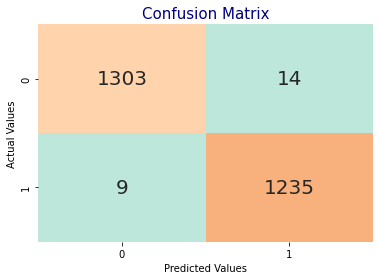

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,rf_pred,model=rf)

Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

The results from the GradientBoostingClassifier()
---------------------
accuracy: 0.9820382663022257
f1: 0.9814665592264303
recall: 0.9751801441152922
precision: 0.9878345498783455


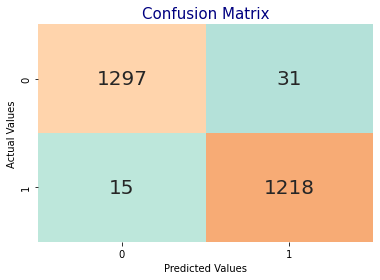

In [93]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,gbc_pred,model=gbc)

XGBoost

In [94]:
import xgboost as xgb

The results from the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
---------------------
accuracy: 0.9933619679812573
f1: 0.9931754315535929
recall: 0.9903923138510808
precision: 0.9959742351046699


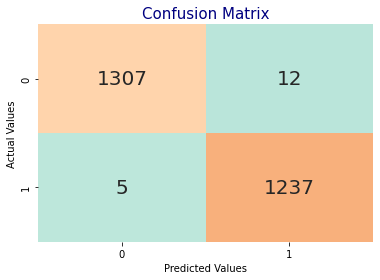

In [95]:
model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)
evaluate_algorithms(X_train, X_test, y_train, y_test,xgb_pred,model=model_xgb)

Accuracy Summary

In [96]:
performance_summary_accuracy = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,LR_pred),
           accuracy_score(y_test,svm_pred),
           accuracy_score(y_test,knn_pred),
           accuracy_score(y_test,dt_pred),
           accuracy_score(y_test,rf_pred),
           accuracy_score(y_test,gbc_pred),
           accuracy_score(y_test,xgb_pred)
          ]
})
performance_summary_accuracy

Model       ACC
0    LR  0.932058
1   SVC  0.953924
2   KNN  0.929324
3    DT  0.982038
4    RF  0.991019
5   GBC  0.982038
6   XGB  0.993362

<AxesSubplot:xlabel='Model', ylabel='ACC'>

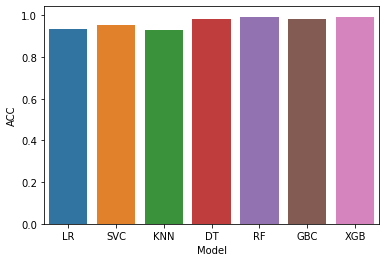

In [97]:
sns.barplot(performance_summary_accuracy['Model'],performance_summary_accuracy['ACC'])

Precision Summary

In [98]:
performance_summary_precision = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,LR_pred),
           precision_score(y_test,svm_pred),
           precision_score(y_test,knn_pred),
           precision_score(y_test,dt_pred),
           precision_score(y_test,rf_pred),
           precision_score(y_test,gbc_pred),
            precision_score(y_test,xgb_pred)
          ]
})
performance_summary_precision

Model  PRECISION
0    LR   0.930344
1   SVC   0.957895
2   KNN   0.894970
3    DT   0.987045
4    RF   0.992765
5   GBC   0.987835
6   XGB   0.995974

<AxesSubplot:xlabel='Model', ylabel='PRECISION'>

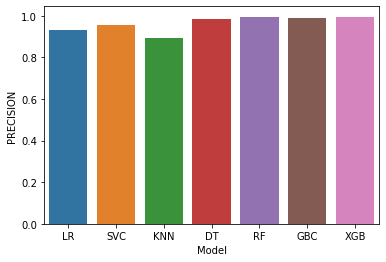

In [99]:
sns.barplot(performance_summary_precision['Model'],performance_summary_precision['PRECISION'])

In [100]:
X_train = sc.fit_transform(X_train)

In [101]:
X.columns

Index(['Monthly_Premium', 'Open_Policies', 'Renew_Offer_Type',
       'Vehicle_Age_In_Years', 'Weeks_Since_Claim',
       'Premium_Increase_In_Percent', 'Claims_Processingtime_In_Days',
       'City_Denver', 'City_Fairfield', 'City_Indianapolis', 'City_Tampa',
       'Work_Status_Employed', 'Work_Status_Medical Leave',
       'Work_Status_Retired', 'Work_Status_Unemployed', 'Gender_Male',
       'Coverage_Type_Premium_Plan', 'Coverage_Type_Primary_Plan',
       'Accessbility_Customer_Call_Centre',
       'Accessbility_Direct Branch Contact', 'Accessbility_Website',
       'Vehicle_Type_Luxirious_Car', 'Vehicle_Type_Luxurious_SUV',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan_4 Door',
       'Vehicle_Type_Sports Car'],
      dtype='object')

<AxesSubplot:>

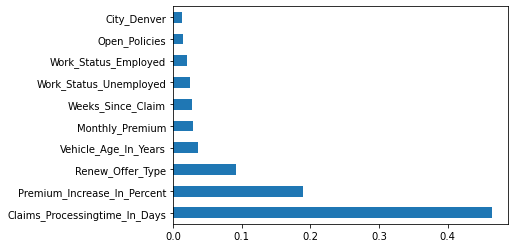

In [102]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [103]:
import joblib

Fitting the RF Model & dumping it into a file so that we can use this trained model for predictions.

In [106]:
rf.fit(X_res,y_res)
joblib.dump(rf, 'rf_churn_predict_model_updated')
rf_model = joblib.load('rf_churn_predict_model_updated')

In [107]:
rf_model.predict([[138,1,1,10,138,5,15,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0]])

array([0], dtype=uint8)

In [108]:
rf_model.predict([[138,2,2,2,60,2,31,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

array([1], dtype=uint8)